In [77]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pyqg
from pyqg import diagnostic_tools as tools

colors = [(0.33725, 0.70588, 0.91373),
          (0.90196, 0.62353, 0.00000),
          (0.00000, 0.61961, 0.45098),
          (0.94118, 0.89412, 0.25882),
          (0.00000, 0.44706, 0.69804),
          (0.83529, 0.36863, 0.00000),
          (0.80000, 0.47451, 0.65490)]

In [2]:
pyqg

<module 'pyqg' from '/Users/mattpudig/Desktop/Uni/PhD/Research/pyqg/pyqg/__init__.py'>

## Test barotropic model with my edits to the kernel and BTModel (test without topographic slopes)

In [22]:
# Grid, dimensions
L =  1000e3     # length scale of box   [m]
Ld = None# 100e3       # deformation radius    [m]
nx = 256.       # number of grid cells per direction

# Height and topography
H = 1e3         # Mean height of layer  [m]
hy = 0. #1e-5   # Gradient of topographic slope in y
hx = 0. #1e-5   # Gradient of topographic slope in x

# Planetary stuff
f0 = 1e-4
omega = 7.2921159e-5
a = 6.371e6
lat = np.arcsin(f0 / (2 * omega))
beta = 2 * omega / a * np.cos(lat)
rek = 0.

# Time
dt = 10800 / 60                # time step [s].
# tmax = 60 * 60 * 24 * 5        # model run time [s]
tmax = dt * 1000


# Create the model object
m = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 f0 = f0, beta = beta, rek = rek,
                 H = H, hy = hy, hx = hx,
                 tmax = tmax, dt = dt, twrite = 10.)

m.run()

INFO:  Logger initialized
INFO: Step: 10, Time: 1.80e+03, KE: 5.18e-01, CFL: 0.141
INFO: Step: 20, Time: 3.60e+03, KE: 5.17e-01, CFL: 0.139
INFO: Step: 30, Time: 5.40e+03, KE: 5.15e-01, CFL: 0.139
INFO: Step: 40, Time: 7.20e+03, KE: 5.14e-01, CFL: 0.136
INFO: Step: 50, Time: 9.00e+03, KE: 5.13e-01, CFL: 0.139
INFO: Step: 60, Time: 1.08e+04, KE: 5.13e-01, CFL: 0.138
INFO: Step: 70, Time: 1.26e+04, KE: 5.12e-01, CFL: 0.138
INFO: Step: 80, Time: 1.44e+04, KE: 5.11e-01, CFL: 0.148
INFO: Step: 90, Time: 1.62e+04, KE: 5.10e-01, CFL: 0.154
INFO: Step: 100, Time: 1.80e+04, KE: 5.09e-01, CFL: 0.148
INFO: Step: 110, Time: 1.98e+04, KE: 5.08e-01, CFL: 0.153
INFO: Step: 120, Time: 2.16e+04, KE: 5.08e-01, CFL: 0.151
INFO: Step: 130, Time: 2.34e+04, KE: 5.07e-01, CFL: 0.152
INFO: Step: 140, Time: 2.52e+04, KE: 5.06e-01, CFL: 0.149
INFO: Step: 150, Time: 2.70e+04, KE: 5.06e-01, CFL: 0.142
INFO: Step: 160, Time: 2.88e+04, KE: 5.05e-01, CFL: 0.135
INFO: Step: 170, Time: 3.06e+04, KE: 5.04e-01, CFL: 0.1

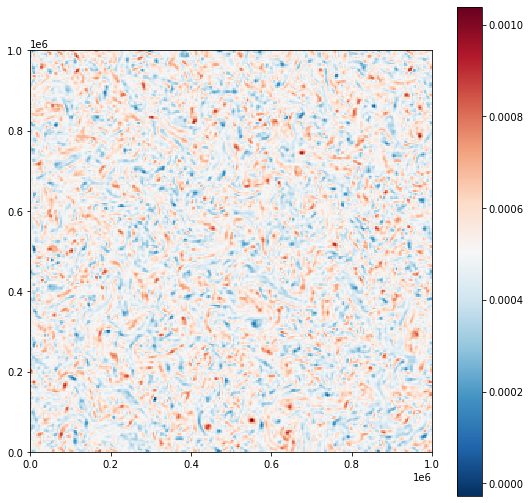

In [23]:
# Convert to xarray for nice metadata etc.

m_ds = m.to_dataset().isel(time=-1)

def plot_q(m, qmax=40):
    fig, ax = plt.subplots(figsize=(9,9))
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    # pc.set_clim([-qmax, qmax])
    # ax.set_xlim([0, 2*np.pi])
    # ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    # plt.title('Time = %g' % m.t)
    plt.show()

plot_q(m_ds)

Notes: Success! The barotropic model runs well, meaning the very minimal changes I made to the kernel/bt_model.py module were not catostrophic to the model's normal running... Now let's try to test my changes by implenting a small slope in y.

## Test barotropic model with my edits to the kernel and BTModel (test with topographic slope in y)

Same parameters as experiment run above, except now with mild slopes in y

In [24]:
# Grid, dimensions
L =  1000e3     # length scale of box   [m]
Ld = None# 100e3       # deformation radius    [m]
nx = 256.       # number of grid cells per direction

# Height and topography
H = 1e3         # Mean height of layer  [m]
hy = 1e-5 #1e-5   # Gradient of topographic slope in y
hx = 0. #   # Gradient of topographic slope in x

# Planetary stuff
f0 = 1e-4
omega = 7.2921159e-5
a = 6.371e6
lat = np.arcsin(f0 / (2 * omega))
beta = 2 * omega / a * np.cos(lat)
rek = 0.

# Time
dt = 10800 / 60                # time step [s]. NB: < 12500.0, which is the time step that worked with similar grid size for 2 layer model no topography
# tmax = 60 * 60 * 24 * 5        # model run time [s]
tmax = dt * 1000


# Create the model object
m_hy = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 f0 = f0, beta = beta, rek = rek,
                 H = H, hy = hy, hx = hx,
                 tmax = tmax, dt = dt, twrite = 10.)

m_hy.run()

INFO:  Logger initialized
INFO: Step: 10, Time: 1.80e+03, KE: 4.54e-01, CFL: 0.128
INFO: Step: 20, Time: 3.60e+03, KE: 4.52e-01, CFL: 0.126
INFO: Step: 30, Time: 5.40e+03, KE: 4.51e-01, CFL: 0.127
INFO: Step: 40, Time: 7.20e+03, KE: 4.50e-01, CFL: 0.129
INFO: Step: 50, Time: 9.00e+03, KE: 4.49e-01, CFL: 0.132
INFO: Step: 60, Time: 1.08e+04, KE: 4.48e-01, CFL: 0.134
INFO: Step: 70, Time: 1.26e+04, KE: 4.48e-01, CFL: 0.135
INFO: Step: 80, Time: 1.44e+04, KE: 4.47e-01, CFL: 0.136
INFO: Step: 90, Time: 1.62e+04, KE: 4.46e-01, CFL: 0.137
INFO: Step: 100, Time: 1.80e+04, KE: 4.45e-01, CFL: 0.135
INFO: Step: 110, Time: 1.98e+04, KE: 4.44e-01, CFL: 0.136
INFO: Step: 120, Time: 2.16e+04, KE: 4.44e-01, CFL: 0.137
INFO: Step: 130, Time: 2.34e+04, KE: 4.43e-01, CFL: 0.136
INFO: Step: 140, Time: 2.52e+04, KE: 4.42e-01, CFL: 0.137
INFO: Step: 150, Time: 2.70e+04, KE: 4.42e-01, CFL: 0.136
INFO: Step: 160, Time: 2.88e+04, KE: 4.41e-01, CFL: 0.140
INFO: Step: 170, Time: 3.06e+04, KE: 4.40e-01, CFL: 0.1

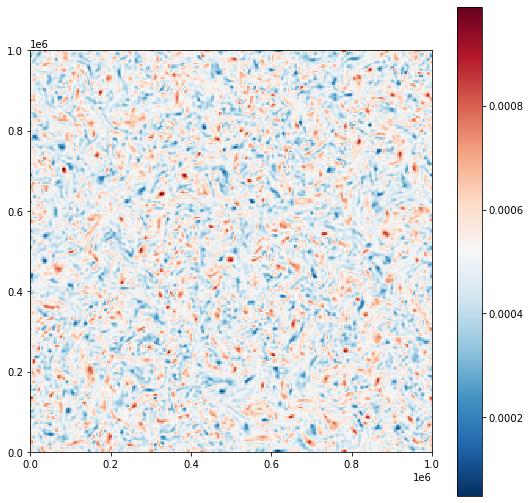

In [25]:
# Convert to xarray for nice metadata etc.

m_hy_ds = m_hy.to_dataset().isel(time=-1)

plot_q(m_hy_ds)

Success again! Model ran fine. To be excected: an $h_y = 1e-5$ slope is equivalent to adding a $1e-12$ term to $\beta = 1e-11$, which we expect therefore to have a small effect.\\

Now let's try with an $h_x \neq 0$ run!

## Test barotropic model with my edits to the kernel and BTModel (test with topographic slopes in y and x)

Same parameters as experiments run above, except now with mild slopes in y _and_ x

In [27]:
# Grid, dimensions
L =  1000e3     # length scale of box   [m]
Ld = None# 100e3       # deformation radius    [m]
nx = 256.       # number of grid cells per direction

# Height and topography
H = 1e3     # Mean height of layer  [m]
hy = 1e-5   # Gradient of topographic slope in y
hx = 1e-5   # Gradient of topographic slope in x

# Planetary stuff
f0 = 1e-4
omega = 7.2921159e-5
a = 6.371e6
lat = np.arcsin(f0 / (2 * omega))
beta = 2 * omega / a * np.cos(lat)
rek = 0.

# Time
dt = 10800 / 60                # time step [s].
# tmax = 60 * 60 * 24 * 5        # model run time [s]
tmax = dt * 1000


# Create the model object
m_hyhx = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 f0 = f0, beta = beta, rek = rek,
                 H = H, hy = hy, hx = hx,
                 tmax = tmax, dt = dt, twrite = 10.)

m_hyhx.run()

INFO:  Logger initialized
INFO: Step: 10, Time: 1.80e+03, KE: 4.32e-01, CFL: 0.144
INFO: Step: 20, Time: 3.60e+03, KE: 4.30e-01, CFL: 0.144
INFO: Step: 30, Time: 5.40e+03, KE: 4.29e-01, CFL: 0.144
INFO: Step: 40, Time: 7.20e+03, KE: 4.28e-01, CFL: 0.144
INFO: Step: 50, Time: 9.00e+03, KE: 4.27e-01, CFL: 0.142
INFO: Step: 60, Time: 1.08e+04, KE: 4.26e-01, CFL: 0.138
INFO: Step: 70, Time: 1.26e+04, KE: 4.26e-01, CFL: 0.133
INFO: Step: 80, Time: 1.44e+04, KE: 4.25e-01, CFL: 0.133
INFO: Step: 90, Time: 1.62e+04, KE: 4.24e-01, CFL: 0.134
INFO: Step: 100, Time: 1.80e+04, KE: 4.23e-01, CFL: 0.128
INFO: Step: 110, Time: 1.98e+04, KE: 4.22e-01, CFL: 0.135
INFO: Step: 120, Time: 2.16e+04, KE: 4.22e-01, CFL: 0.131
INFO: Step: 130, Time: 2.34e+04, KE: 4.21e-01, CFL: 0.130
INFO: Step: 140, Time: 2.52e+04, KE: 4.20e-01, CFL: 0.128
INFO: Step: 150, Time: 2.70e+04, KE: 4.19e-01, CFL: 0.131
INFO: Step: 160, Time: 2.88e+04, KE: 4.19e-01, CFL: 0.131
INFO: Step: 170, Time: 3.06e+04, KE: 4.18e-01, CFL: 0.1

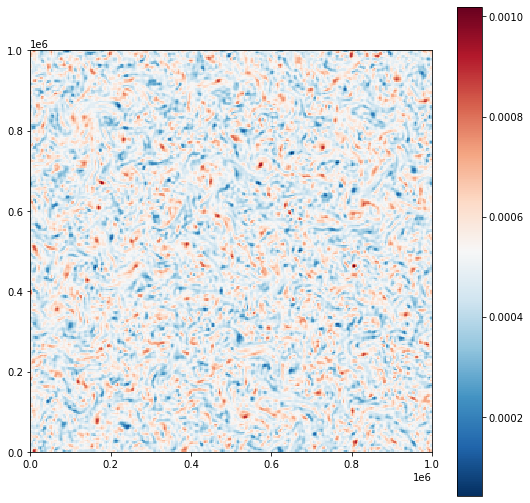

In [28]:
# Convert to xarray for nice metadata etc.

m_hyhx_ds = m_hyhx.to_dataset().isel(time=-1)

plot_q(m_hyhx_ds)

## Real test: barotropic model attempt to run for many years

Use same parameters as used in the previous experiment, except now try to run for several years

In [33]:
# Grid, dimensions
L =  1000e3     # length scale of box   [m]
Ld = None# 100e3       # deformation radius    [m]
nx = 256.       # number of grid cells per direction

# Height and topography
H = 1e3     # Mean height of layer  [m]
hy = 1e-5   # Gradient of topographic slope in y
hx = 1e-5   # Gradient of topographic slope in x

# Planetary stuff
f0 = 1e-4
omega = 7.2921159e-5
a = 6.371e6
lat = np.arcsin(f0 / (2 * omega))
beta = 2 * omega / a * np.cos(lat)
rek = 0.

# Time
year = 60 * 60 * 24 * 365. # year [s] 
tmax = year * 5.           # time of integration [s]
dt = 600                   # time step [s]

tavestart = year           # start averaging after 1 year [s]
taveint = 60 * 60 * 24     # daily averages [s]


# Create the model object
m_bt = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 f0 = f0, beta = beta, rek = rek,
                 H = H, hy = hy, hx = hx,
                 tmax = tmax, dt = dt,
                 tavestart = tavestart, taveint = taveint, twrite = 10000.)

m_bt.run()

INFO:  Logger initialized
INFO: Step: 10000, Time: 3.00e+06, KE: 4.54e-01, CFL: 0.240
INFO: Step: 20000, Time: 6.00e+06, KE: 4.53e-01, CFL: 0.185
INFO: Step: 30000, Time: 9.00e+06, KE: 4.53e-01, CFL: 0.202
INFO: Step: 40000, Time: 1.20e+07, KE: 4.53e-01, CFL: 0.176
INFO: Step: 50000, Time: 1.50e+07, KE: 4.53e-01, CFL: 0.198
INFO: Step: 60000, Time: 1.80e+07, KE: 4.52e-01, CFL: 0.206
INFO: Step: 70000, Time: 2.10e+07, KE: 4.52e-01, CFL: 0.199
INFO: Step: 80000, Time: 2.40e+07, KE: 4.52e-01, CFL: 0.190
INFO: Step: 90000, Time: 2.70e+07, KE: 4.52e-01, CFL: 0.183
INFO: Step: 100000, Time: 3.00e+07, KE: 4.52e-01, CFL: 0.212
INFO: Step: 110000, Time: 3.30e+07, KE: 4.52e-01, CFL: 0.193
INFO: Step: 120000, Time: 3.60e+07, KE: 4.52e-01, CFL: 0.188
INFO: Step: 130000, Time: 3.90e+07, KE: 4.52e-01, CFL: 0.168
INFO: Step: 140000, Time: 4.20e+07, KE: 4.52e-01, CFL: 0.147
INFO: Step: 150000, Time: 4.50e+07, KE: 4.52e-01, CFL: 0.157
INFO: Step: 160000, Time: 4.80e+07, KE: 4.52e-01, CFL: 0.183
INFO: S

In [55]:
# Convert to xarray for nice metadata etc.

m_bt_ds = m_bt.to_dataset().isel(time=-1)

Text(0.5, 1.0, 'Full PV')

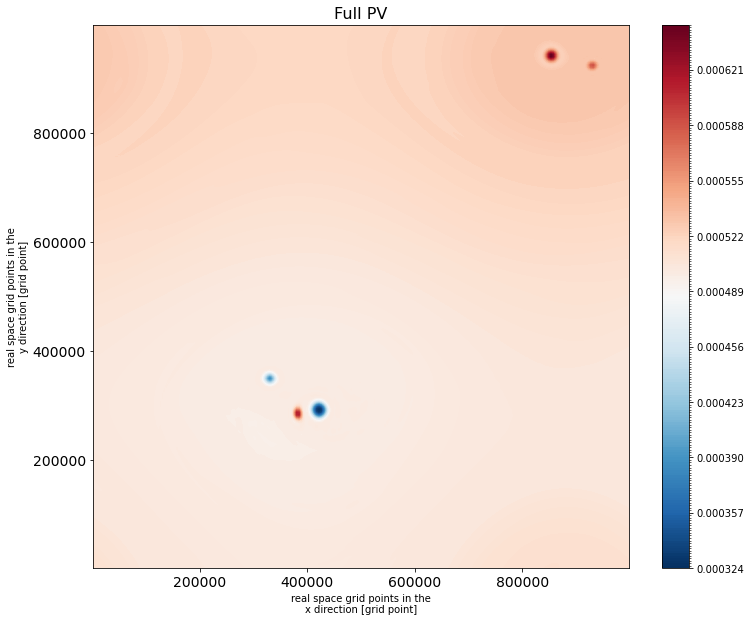

In [67]:
# plot pv

q_full = m_bt_ds.q.isel(lev=0) + (beta + f0 / H * hy) * m_bt_ds.y + (f0 / H * hx) * m_bt_ds.x

plt.figure(figsize=(12,10))
fontsize=16 

q_full.plot.contourf(levels = 300, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('Full PV', fontsize = fontsize)

Text(0.5, 1.0, 'Full PV')

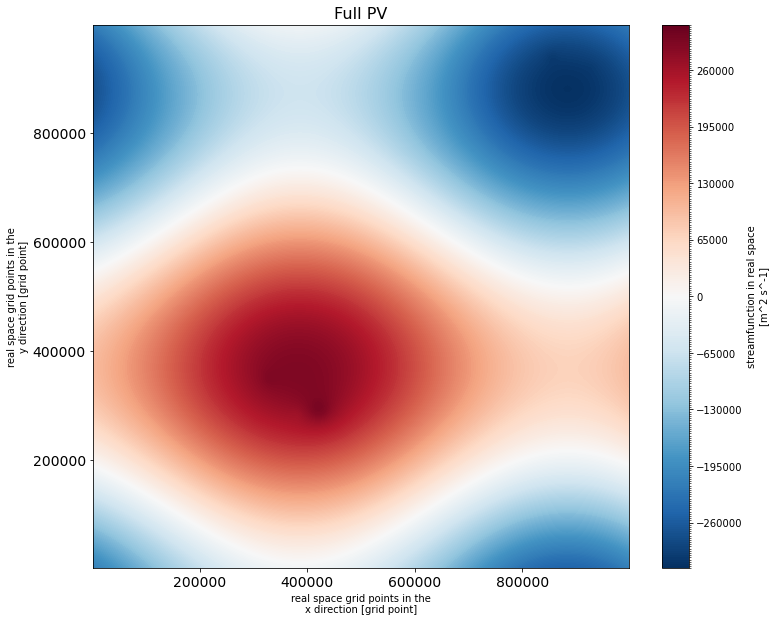

In [68]:
# plot streamfunction

streamfunction = m_bt_ds.p.isel(lev=0)

plt.figure(figsize=(12,10))
fontsize=16 

streamfunction.plot.contourf(levels = 300, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('Full PV', fontsize = fontsize)

Text(0.5, 1.0, 'v')

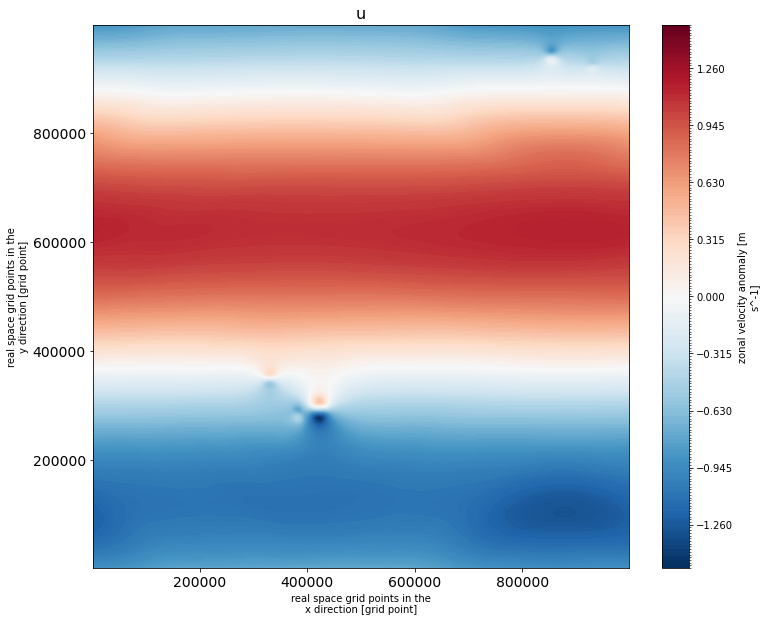

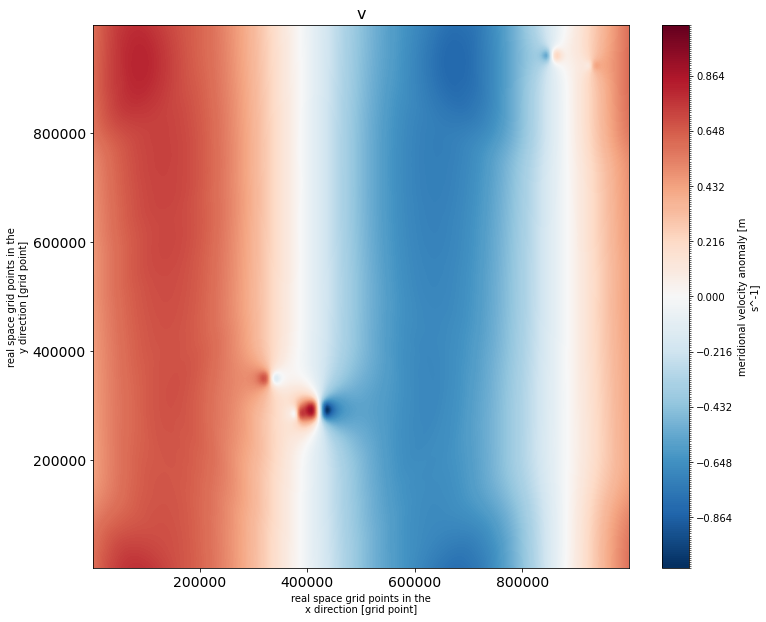

In [71]:
# plot velocities

u = m_bt_ds.u.isel(lev=0)

plt.figure(figsize=(12,10))
fontsize=16 

u.plot.contourf(levels = 300, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('u', fontsize = fontsize)


v = m_bt_ds.v.isel(lev=0)

plt.figure(figsize=(12,10))
fontsize=16 

v.plot.contourf(levels = 300, cmap = 'RdBu_r')
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.title('v', fontsize = fontsize)

Text(0.5, 1.0, 'Kinetic Energy Spectrum')

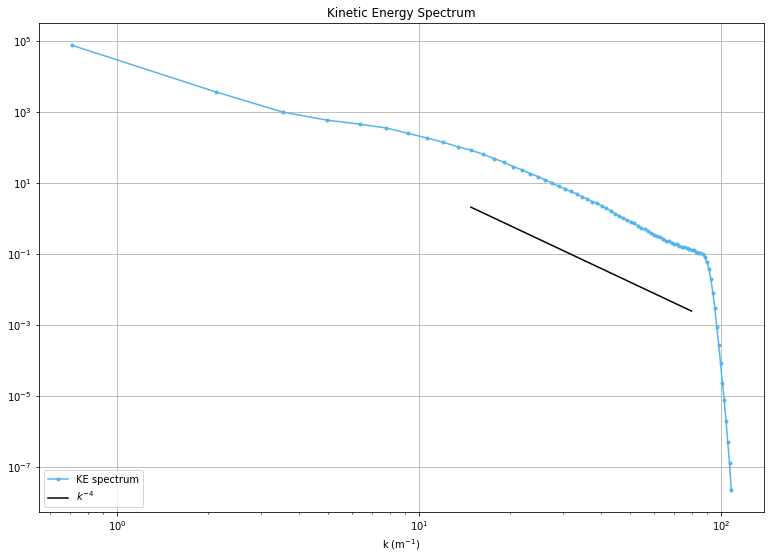

In [89]:
# kinetic energy

kr, kespec = tools.calc_ispec(m_bt, m_bt_ds.KEspec.isel(lev = 0).data)

kr = kr / (2 * np.pi / L)

# Note: I want to make the above two things xarray datasets to have nice metadata qualities

energy_cutoff = 1e-8
index = np.abs(kespec - energy_cutoff).argmin()

plt.figure(figsize=(13,9))

plt.loglog(kr[:index], kespec[:index], '.-', color = colors[0], label='KE spectrum')
plt.loglog(kr[10:index-20], kr[10:index-20]**(-4) * 10**5, color = 'k', label = r'$k^{-4}$')

plt.legend(loc='lower left')
plt.xlabel(r'k (m$^{-1}$)')
plt.grid()
# plt.ylim(1e-14, None)
plt.title('Kinetic Energy Spectrum')

In [397]:
m_bt_test = pyqg.BTModel(L = L, rd = Ld, nx = nx,
                 f0 = f0, beta = beta * 500, rek = rek,
                 H = H, hy = hy, hx = hx * 10000,
                 tmax = tmax, dt = dt,
                 tavestart = tavestart, taveint = taveint)

INFO:  Logger initialized


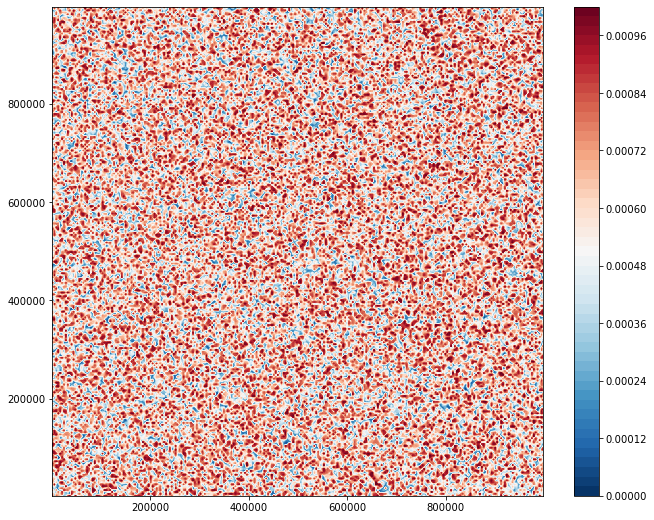

In [398]:
# # Ring energy spectrum

# K_ring_inner = 8. * (2 * np.pi / m_bt.L)
# K_ring_outer = 12. * (2 * np.pi / m_bt.L)

# nhx,nhy = m_bt.wv.shape
# wvx = np.sqrt((m_bt.k)**2.+(m_bt.l)**2.)
        
# mask = np.ones_like(wvx)
# mask[wvx < K_ring_inner] = 0.
# mask[wvx > K_ring_outer] = 0.

# ring_hat = mask * (np.random.randn(nhx,nhy) + 1j * np.random.randn(nhx,nhy))

# ring = m_bt.ifft( ring_hat[np.newaxis, :, :] )
# ring = ring# - ring.mean()

# ring_hat = m_bt.fft( ring )

# KEaux = m_bt.spec_var( m_bt.wv * ring_hat )

# pih = ring_hat / np.sqrt(KEaux)
# qih = - m_bt.wv2 * pih

# qi = m_bt.ifft(qih)

# m_bt_ds.q.isel(lev=0) + (beta + f0 / H * hy) * m_bt_ds.y + (f0 / H * hx) * m_bt_ds.x

# plt.figure(figsize=(11,9))
# plt.contourf(m_bt.x, m_bt.y, qi.squeeze() + (beta + f0 / H * hy) * m_bt_ds.y.data + (f0 / H * hx) * m_bt_ds.x.data, cmap='RdBu_r', levels=50)
# plt.colorbar()

plt.figure(figsize=(11,9))
plt.contourf(m_bt.x, m_bt.y, m_bt_test.q.squeeze() + (beta + f0 / H * hy) * m_bt_ds.y.data + (f0 / H * hx) * m_bt_ds.x.data, cmap='RdBu_r', levels=50)
plt.colorbar()

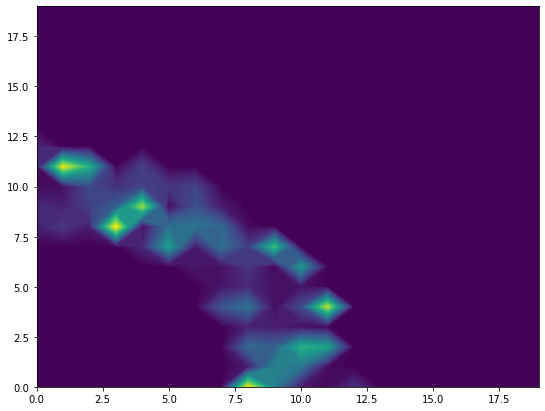

In [399]:
e_spec = np.abs(pih.squeeze()) ** 2

k = m_bt.k / (2 * np.pi / m_bt.L)
l = m_bt.l / (2 * np.pi / m_bt.L)

plt.figure(figsize=(9,7))
index = 20

plt.contourf(k[:index, :index],
             l[:index, :index],
             e_spec[:index, :index], levels=100)

In [400]:
# initialize the model with that initial condition
# m_bt_test.set_q(qi)

def plot_q(m):
    fig, ax = plt.subplots()
    x = m.x#.data
    y = m.y#.data
    
    pc = ax.pcolormesh(x, y, m.q.squeeze() + (beta + f0 / H * hy) * y + (f0 / H * hx) * x, cmap='RdBu_r')
    # pc.set_clim([-qmax, qmax])
    # ax.set_xlim([0, 2*np.pi])
    # ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

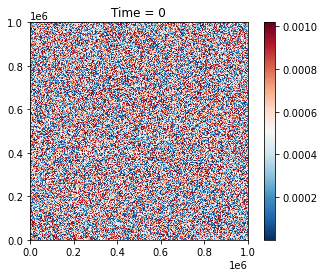

INFO: Step: 1000, Time: 3.00e+05, KE: 3.47e-01, CFL: 0.166
INFO: Step: 2000, Time: 6.00e+05, KE: 3.28e-01, CFL: 0.171
INFO: Step: 3000, Time: 9.00e+05, KE: 3.18e-01, CFL: 0.160
INFO: Step: 4000, Time: 1.20e+06, KE: 3.11e-01, CFL: 0.169
INFO: Step: 5000, Time: 1.50e+06, KE: 3.05e-01, CFL: 0.158


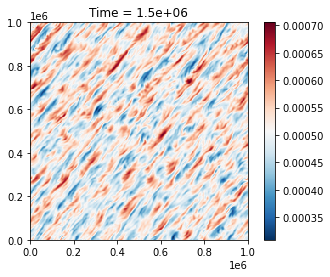

INFO: Step: 6000, Time: 1.80e+06, KE: 3.01e-01, CFL: 0.156
INFO: Step: 7000, Time: 2.10e+06, KE: 2.96e-01, CFL: 0.152
INFO: Step: 8000, Time: 2.40e+06, KE: 2.93e-01, CFL: 0.182
INFO: Step: 9000, Time: 2.70e+06, KE: 2.89e-01, CFL: 0.134
INFO: Step: 10000, Time: 3.00e+06, KE: 2.86e-01, CFL: 0.154


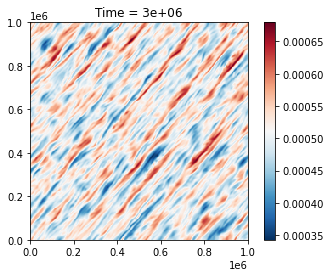

INFO: Step: 11000, Time: 3.30e+06, KE: 2.83e-01, CFL: 0.150
INFO: Step: 12000, Time: 3.60e+06, KE: 2.81e-01, CFL: 0.143
INFO: Step: 13000, Time: 3.90e+06, KE: 2.78e-01, CFL: 0.144
INFO: Step: 14000, Time: 4.20e+06, KE: 2.76e-01, CFL: 0.149
INFO: Step: 15000, Time: 4.50e+06, KE: 2.74e-01, CFL: 0.131


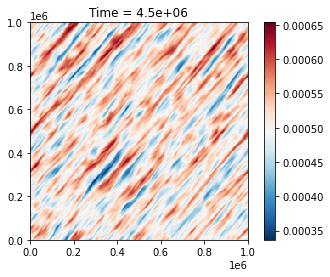

INFO: Step: 16000, Time: 4.80e+06, KE: 2.72e-01, CFL: 0.133
INFO: Step: 17000, Time: 5.10e+06, KE: 2.70e-01, CFL: 0.138
INFO: Step: 18000, Time: 5.40e+06, KE: 2.68e-01, CFL: 0.144
INFO: Step: 19000, Time: 5.70e+06, KE: 2.66e-01, CFL: 0.149
INFO: Step: 20000, Time: 6.00e+06, KE: 2.65e-01, CFL: 0.151


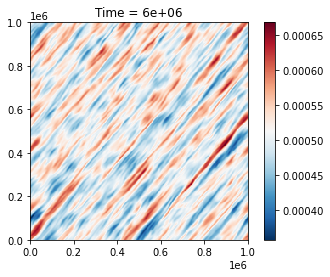

INFO: Step: 21000, Time: 6.30e+06, KE: 2.63e-01, CFL: 0.141
INFO: Step: 22000, Time: 6.60e+06, KE: 2.61e-01, CFL: 0.137
INFO: Step: 23000, Time: 6.90e+06, KE: 2.60e-01, CFL: 0.143
INFO: Step: 24000, Time: 7.20e+06, KE: 2.58e-01, CFL: 0.143
INFO: Step: 25000, Time: 7.50e+06, KE: 2.57e-01, CFL: 0.157


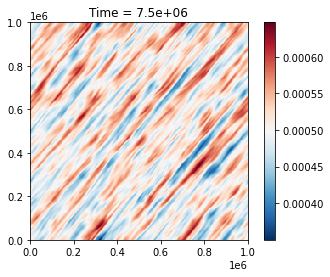

INFO: Step: 26000, Time: 7.80e+06, KE: 2.55e-01, CFL: 0.140
INFO: Step: 27000, Time: 8.10e+06, KE: 2.54e-01, CFL: 0.133
INFO: Step: 28000, Time: 8.40e+06, KE: 2.53e-01, CFL: 0.155
INFO: Step: 29000, Time: 8.70e+06, KE: 2.51e-01, CFL: 0.124
INFO: Step: 30000, Time: 9.00e+06, KE: 2.50e-01, CFL: 0.157


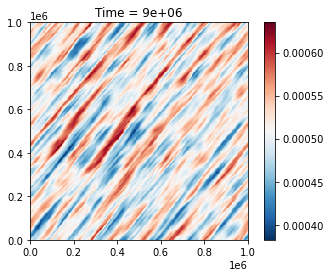

INFO: Step: 31000, Time: 9.30e+06, KE: 2.49e-01, CFL: 0.126
INFO: Step: 32000, Time: 9.60e+06, KE: 2.48e-01, CFL: 0.140
INFO: Step: 33000, Time: 9.90e+06, KE: 2.47e-01, CFL: 0.155
INFO: Step: 34000, Time: 1.02e+07, KE: 2.46e-01, CFL: 0.150
INFO: Step: 35000, Time: 1.05e+07, KE: 2.45e-01, CFL: 0.122


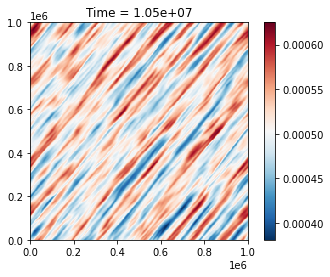

INFO: Step: 36000, Time: 1.08e+07, KE: 2.44e-01, CFL: 0.129
INFO: Step: 37000, Time: 1.11e+07, KE: 2.43e-01, CFL: 0.148
INFO: Step: 38000, Time: 1.14e+07, KE: 2.42e-01, CFL: 0.175
INFO: Step: 39000, Time: 1.17e+07, KE: 2.42e-01, CFL: 0.124
INFO: Step: 40000, Time: 1.20e+07, KE: 2.41e-01, CFL: 0.136


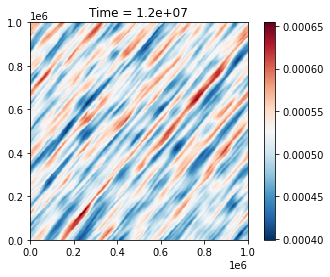

INFO: Step: 41000, Time: 1.23e+07, KE: 2.40e-01, CFL: 0.119
INFO: Step: 42000, Time: 1.26e+07, KE: 2.39e-01, CFL: 0.142
INFO: Step: 43000, Time: 1.29e+07, KE: 2.38e-01, CFL: 0.129
INFO: Step: 44000, Time: 1.32e+07, KE: 2.38e-01, CFL: 0.143
INFO: Step: 45000, Time: 1.35e+07, KE: 2.37e-01, CFL: 0.167


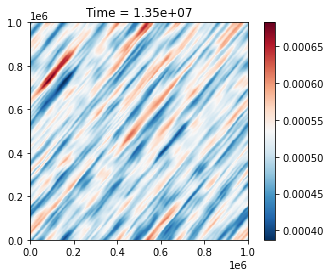

INFO: Step: 46000, Time: 1.38e+07, KE: 2.36e-01, CFL: 0.126
INFO: Step: 47000, Time: 1.41e+07, KE: 2.36e-01, CFL: 0.167
INFO: Step: 48000, Time: 1.44e+07, KE: 2.35e-01, CFL: 0.129
INFO: Step: 49000, Time: 1.47e+07, KE: 2.34e-01, CFL: 0.139
INFO: Step: 50000, Time: 1.50e+07, KE: 2.34e-01, CFL: 0.134


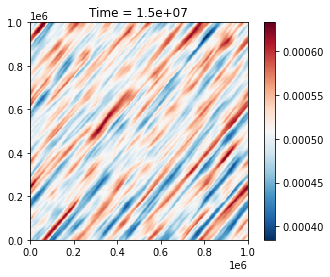

INFO: Step: 51000, Time: 1.53e+07, KE: 2.33e-01, CFL: 0.129
INFO: Step: 52000, Time: 1.56e+07, KE: 2.33e-01, CFL: 0.153
INFO: Step: 53000, Time: 1.59e+07, KE: 2.32e-01, CFL: 0.139
INFO: Step: 54000, Time: 1.62e+07, KE: 2.31e-01, CFL: 0.141
INFO: Step: 55000, Time: 1.65e+07, KE: 2.31e-01, CFL: 0.126


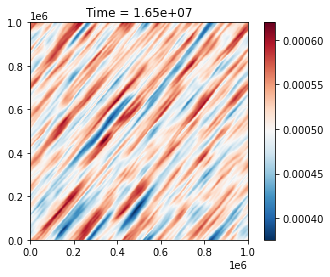

INFO: Step: 56000, Time: 1.68e+07, KE: 2.30e-01, CFL: 0.144
INFO: Step: 57000, Time: 1.71e+07, KE: 2.30e-01, CFL: 0.162
INFO: Step: 58000, Time: 1.74e+07, KE: 2.29e-01, CFL: 0.138
INFO: Step: 59000, Time: 1.77e+07, KE: 2.29e-01, CFL: 0.138
INFO: Step: 60000, Time: 1.80e+07, KE: 2.28e-01, CFL: 0.135


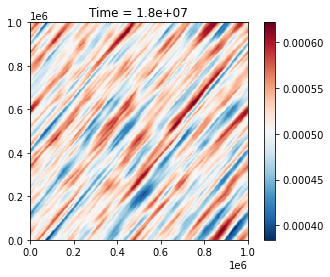

INFO: Step: 61000, Time: 1.83e+07, KE: 2.28e-01, CFL: 0.133
INFO: Step: 62000, Time: 1.86e+07, KE: 2.27e-01, CFL: 0.128
INFO: Step: 63000, Time: 1.89e+07, KE: 2.27e-01, CFL: 0.142
INFO: Step: 64000, Time: 1.92e+07, KE: 2.27e-01, CFL: 0.125
INFO: Step: 65000, Time: 1.95e+07, KE: 2.26e-01, CFL: 0.137


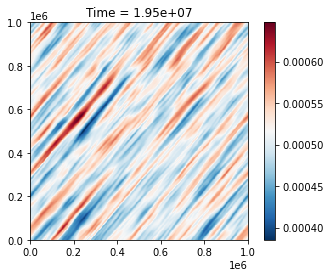

INFO: Step: 66000, Time: 1.98e+07, KE: 2.26e-01, CFL: 0.157
INFO: Step: 67000, Time: 2.01e+07, KE: 2.25e-01, CFL: 0.135
INFO: Step: 68000, Time: 2.04e+07, KE: 2.25e-01, CFL: 0.138
INFO: Step: 69000, Time: 2.07e+07, KE: 2.25e-01, CFL: 0.123


KeyboardInterrupt: 

In [401]:
plot_q(m_bt_test)

for _ in m_bt_test.run_with_snapshots(tsnapstart=0, tsnapint= dt * 5000):
    plot_q(m_bt_test)